In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2 as cv
import ntpath
import random



[-1.         -0.96363636 -0.92727273 -0.89090909 -0.85454545 -0.81818182
 -0.78181818 -0.74545455 -0.70909091 -0.67272727 -0.63636364 -0.6
 -0.56363636 -0.52727273 -0.49090909 -0.45454545 -0.41818182 -0.38181818
 -0.34545455 -0.30909091 -0.27272727 -0.23636364 -0.2        -0.16363636
 -0.12727273 -0.09090909 -0.05454545 -0.01818182  0.01818182  0.05454545
  0.09090909  0.12727273  0.16363636  0.2         0.23636364  0.27272727
  0.30909091  0.34545455  0.38181818  0.41818182  0.45454545  0.49090909
  0.52727273  0.56363636  0.6         0.63636364  0.67272727  0.70909091
  0.74545455  0.78181818  0.81818182  0.85454545  0.89090909  0.92727273
  0.96363636  1.        ]


C:\Users\shahv\AppData\Local\Temp\ipykernel_620\3512300308.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


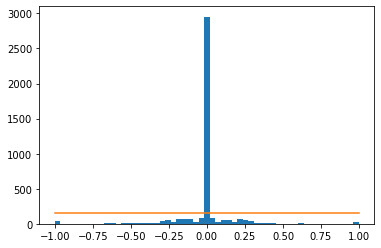

In [162]:
#Little bit of Exploratory Data Analysis/ DATA VISUALIZATION...

columns = ["Center","Left","Right","Steering","throttle","Reverse", "speed"]
data = pd.read_csv('C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\driving_log.csv',names = columns)
pd.set_option('display.max_colwidth',-1)
data.head()

def path_1(path):                      #editing the directory path
    head, tail = ntpath.split(path)
    return tail
data["Center"]=data["Center"].apply(path_1)
data["Left"]=data["Left"].apply(path_1)
data["Right"]=data["Right"].apply(path_1)
data.head()

#plotting steering angles/main focus on histogram for the distribution of the data..
numbers = 55
Threshold = 150
histogram, bin = np.histogram(data["Steering"],numbers)
print(bin)

plt.hist(data["Steering"],numbers)
plt.plot((np.min(data["Steering"]),np.max(data["Steering"])),(Threshold,Threshold))







[-1.         -0.96363636 -0.92727273 -0.89090909 -0.85454545 -0.81818182
 -0.78181818 -0.74545455 -0.70909091 -0.67272727 -0.63636364 -0.6
 -0.56363636 -0.52727273 -0.49090909 -0.45454545 -0.41818182 -0.38181818
 -0.34545455 -0.30909091 -0.27272727 -0.23636364 -0.2        -0.16363636
 -0.12727273 -0.09090909 -0.05454545 -0.01818182  0.01818182  0.05454545
  0.09090909  0.12727273  0.16363636  0.2         0.23636364  0.27272727
  0.30909091  0.34545455  0.38181818  0.41818182  0.45454545  0.49090909
  0.52727273  0.56363636  0.6         0.63636364  0.67272727  0.70909091
  0.74545455  0.78181818  0.81818182  0.85454545  0.89090909  0.92727273
  0.96363636  1.        ]


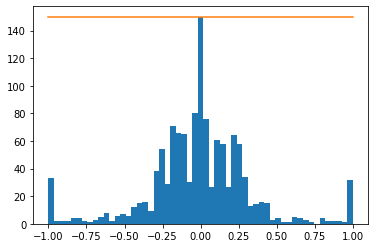

In [163]:
#DATA BALANCING: PREPROCESSING TECHNIQUESSSS:::
from sklearn.utils import shuffle
remove = []
for i in range(numbers):
    ls = []
    for j in range(len(data["Steering"])):
        if data["Steering"][j]>= bin[i] and data["Steering"][j] <= bin[i+1]:
            ls.append(j)
    ls = shuffle(ls)  
    ls = ls[Threshold:]
    remove.extend(ls)   
data.drop(data.index[remove], inplace = True)

histogram, bin = np.histogram(data["Steering"],numbers)
print(bin)

plt.hist(data["Steering"],numbers)
plt.plot((np.min(data["Steering"]),np.max(data["Steering"])),(Threshold,Threshold))

In [164]:
import os
from sklearn.model_selection import train_test_split
def  load(path_2):
    img_path = []
    steering = []
    for i in range(len(data)):
        index = data.iloc[i]
        #print(index)
        Center, Left, Right = index[0],index[1],index[2]
        img_path.append(os.path.join(path_2, Center.strip()))
        steering.append(float(index[3]))
    img_path = np.asarray(img_path)
    steering = np.asarray(steering)
    return img_path, steering 
img_path, steering = load('C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG')    
print(img_path)        
print(steering.shape)       


x_train,x_val,y_train,y_val = train_test_split(img_path, steering, test_size  = 0.2,random_state = 6)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

['C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG\\center_2018_07_16_17_11_44_413.jpg'
 'C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG\\center_2018_07_16_17_11_44_485.jpg'
 'C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG\\center_2018_07_16_17_11_44_558.jpg'
 ...
 'C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG\\center_2018_07_16_17_16_29_761.jpg'
 'C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG\\center_2018_07_16_17_16_29_833.jpg'
 'C:\\Users\\shahv\\DATA_SELF_DRIVING\\track-master\\IMG\\center_2018_07_16_17_16_30_200.jpg']
(1250,)
1000
250
1000
250


(array([ 7.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         3.,  0.,  4.,  2.,  2.,  3., 12., 11.,  5., 14.,  9., 12.,  7.,
        15., 37., 16.,  6., 12., 12.,  5., 16., 10.,  6.,  2.,  4.,  2.,
         2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  6.]),
 array([-1.        , -0.96363636, -0.92727273, -0.89090909, -0.85454545,
        -0.81818182, -0.78181818, -0.74545455, -0.70909091, -0.67272727,
        -0.63636364, -0.6       , -0.56363636, -0.52727273, -0.49090909,
        -0.45454545, -0.41818182, -0.38181818, -0.34545455, -0.30909091,
        -0.27272727, -0.23636364, -0.2       , -0.16363636, -0.12727273,
        -0.09090909, -0.05454545, -0.01818182,  0.01818182,  0.05454545,
         0.09090909,  0.12727273,  0.16363636,  0.2       ,  0.23636364,
         0.27272727,  0.30909091,  0.34545455,  0.38181818,  0.41818182,
         0.45454545,  0.49090909,  0.52727273,  0.56363636,  0.6       ,
         0.63636364,  0.67

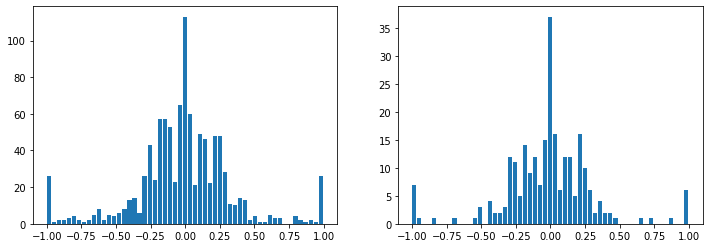

In [165]:
fig, ax = plt.subplots(1,2,figsize =(12,4))
ax[0].hist(y_train,numbers, width = 0.03)
ax[1].hist(y_val,numbers, width = 0.03)


(1000, 60, 200, 3)


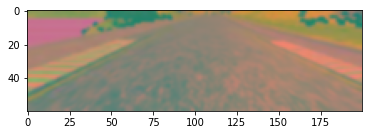

In [166]:
#IMAGE PREPROCESSING.....

def preprocess(img):
    m = cv.imread(img)
    m = m[60:135,:,:]
    m = cv.cvtColor(m,cv.COLOR_RGB2YUV)
    m = cv.resize(m,(200,60))
    m = cv.GaussianBlur(m,(3,3),0)
    m = m/255   #Normalisation of the Data.
    return m
image = img_path[10]

#original = cv.imread(image)
#preprocessd = preprocess(image)

#fig, ax = plt.subplots(1,2,figsize =(12,4))
#ax[0].imshow(original)
#ax[1].imshow(preprocessd)


x_train= np.array(list(map(preprocess,x_train)))
x_val= np.array(list(map(preprocess,x_val)))
plt.imshow(x_train[random.randint(0, len(data)-1)])
print(x_train.shape)

In [167]:
#NVIDIA MODEL....

def model_nvidia():
    model = Sequential()
    model.add(Conv2D(24,kernel_size =(5,5), strides = (2,2), input_shape =(60,200,3), activation = 'relu' ))
    model.add(Conv2D(36,kernel_size =(5,5), strides = (2,2), activation = 'relu' ))
    model.add(Conv2D(48,kernel_size =(5,5), strides = (2,2), activation = 'relu' ))
    model.add(Conv2D(64,kernel_size =(2,2), activation = 'relu' ))
    model.add(Conv2D(64,kernel_size =(2,2), activation = 'relu' ))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(Dense(100,activation = 'relu'))
    model.add(Dense(50,activation = 'relu'))
    model.add(Dense(10,activation = 'relu'))
    model.add(Dense(1))
    model.compile(Adam(lr = 0.001), loss = 'mse')
    return model

model = model_nvidia()
print(model.summary())
model.fit(x_train,y_train, epochs = 30, validation_data=(x_val,y_val), batch_size = 100, verbose = 1,shuffle = 1)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 28, 98, 24)        1824      
                                                                 
 conv2d_59 (Conv2D)          (None, 12, 47, 36)        21636     
                                                                 
 conv2d_60 (Conv2D)          (None, 4, 22, 48)         43248     
                                                                 
 conv2d_61 (Conv2D)          (None, 3, 21, 64)         12352     
                                                                 
 conv2d_62 (Conv2D)          (None, 2, 20, 64)         16448     
                                                                 
 dropout_14 (Dropout)        (None, 2, 20, 64)         0         
                                                                 
 flatten_7 (Flatten)         (None, 2560)            

c:\Users\shahv\3D Objects\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 3s 211ms/step - loss: 0.1257 - val_loss: 0.1056
Epoch 2/30
10/10 [==============================] - 2s 186ms/step - loss: 0.1208 - val_loss: 0.1056
Epoch 3/30
10/10 [==============================] - 2s 184ms/step - loss: 0.1206 - val_loss: 0.1055
Epoch 4/30
10/10 [==============================] - 2s 185ms/step - loss: 0.1205 - val_loss: 0.1049
Epoch 5/30
10/10 [==============================] - 2s 189ms/step - loss: 0.1187 - val_loss: 0.0996
Epoch 6/30
10/10 [==============================] - 2s 186ms/step - loss: 0.1100 - val_loss: 0.0844
Epoch 7/30
10/10 [==============================] - 2s 185ms/step - loss: 0.1038 - val_loss: 0.0742
Epoch 8/30
10/10 [==============================] - 2s 186ms/step - loss: 0.0914 - val_loss: 0.0663
Epoch 9/30
10/10 [==============================] - 2s 187ms/step - loss: 0.0810 - val_loss: 0.0557
Epoch 10/30
10/10 [==============================] - 2s 195ms/step - loss: 0.0695 - val_loss: 0.0473
Epoch 11/3